In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [7]:
initial = [{'a': 0.1275, 'h': 0.2,'k': 0.2, 'm': 0.001965},{'a':0.3, 'h': 0.0, 'k':-0.3, 'm':0.005000}]
Nitersmala = 5000
Niteralmala = 5000
Niteremcee = 24*500
np.random.seed(99)

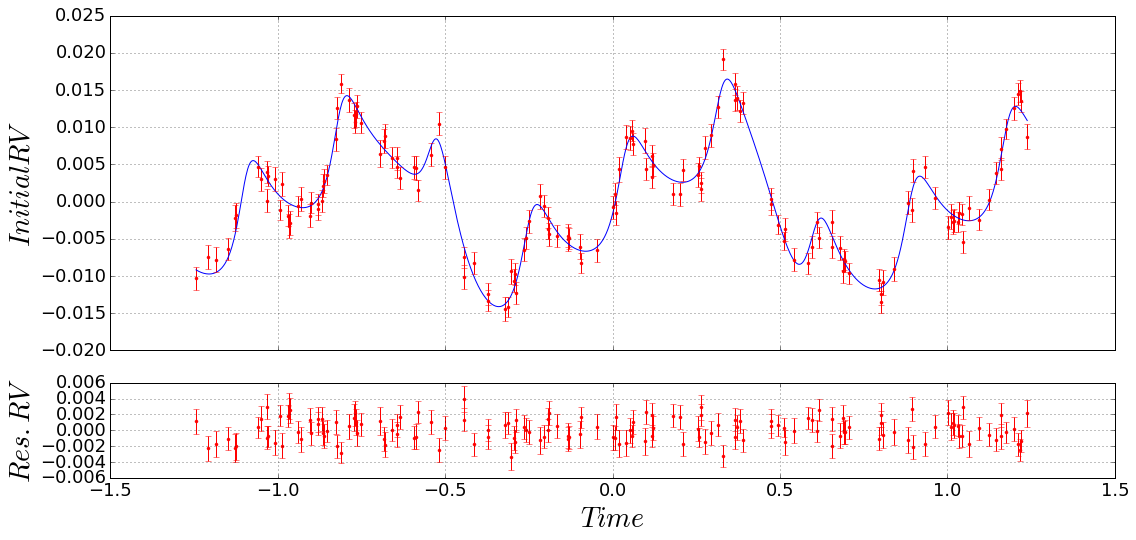

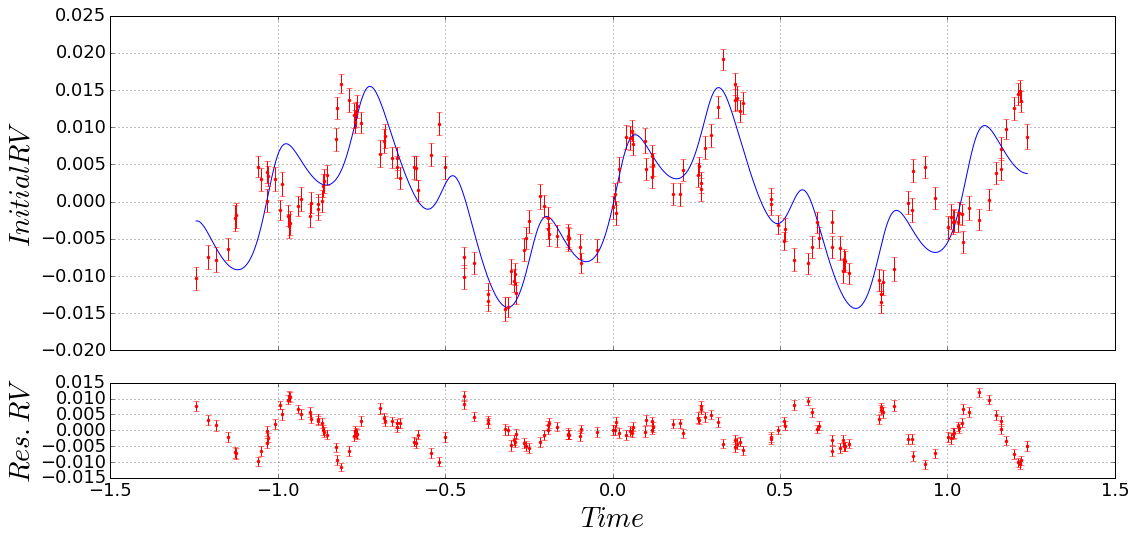

In [8]:
initial_state = state.State(planets = initial, ignore_vars='m')
obs = driver.createObs(initial_state, 150, 15e-4, 10e-5, 2.5)
driver.inLinePlotObs(initial_state, obs, [18,6])
starting_state = state.State(planets = 
    [{'a': 0.12, 'h': 0.1,'k': 0.1, 'm': 0.0019},{'a':0.3, 'h': 0.0, 'k':-0.1, 'm':0.005100}], ignore_vars='m')
driver.inLinePlotObs(starting_state, obs, [18,6])

# Smala

In [9]:
sm_bundle, h1 = driver.createSMALA('moderate_sm', 30, starting_state, obs, 0.25, 0.14, printing_every=20)

Progress: 3.3333%, 1 accepted steps have been made, time: 2017-03-02 19:33:49.590351
Progress: 70.0%, 13 accepted steps have been made, time: 2017-03-02 19:33:59.447815
Acceptance rate: 56.67%
The id of the simulation is: a4b9ba2422fb421fab6aaff5a85b9569
The end time of the simulation is 2017-03-02 19:34:02.931734


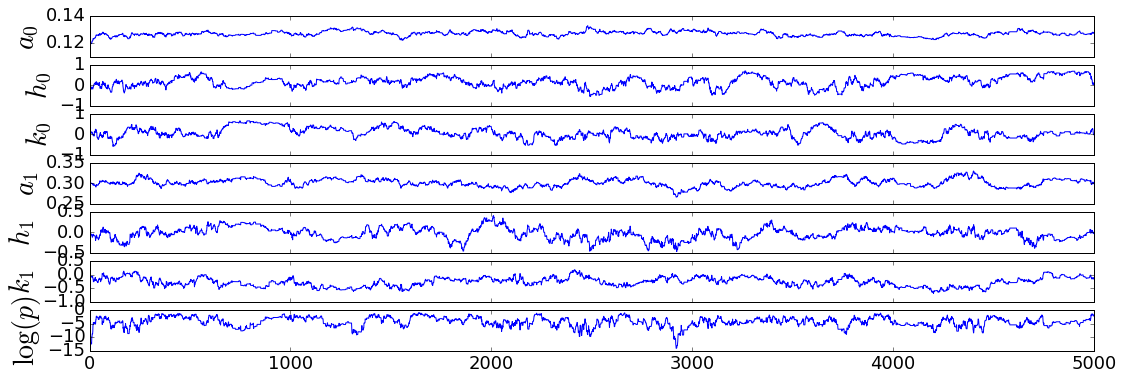

In [6]:
driver.inLinePlotChains(sm_bundle, [18,6])

Eliminated burn in, sampled every 2.
Selected some 150 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$a_1$', '$h_1$', '$k_1$']
[ 0.12697362  0.20669834 -0.0190972   0.30047802 -0.05444033 -0.26589096]


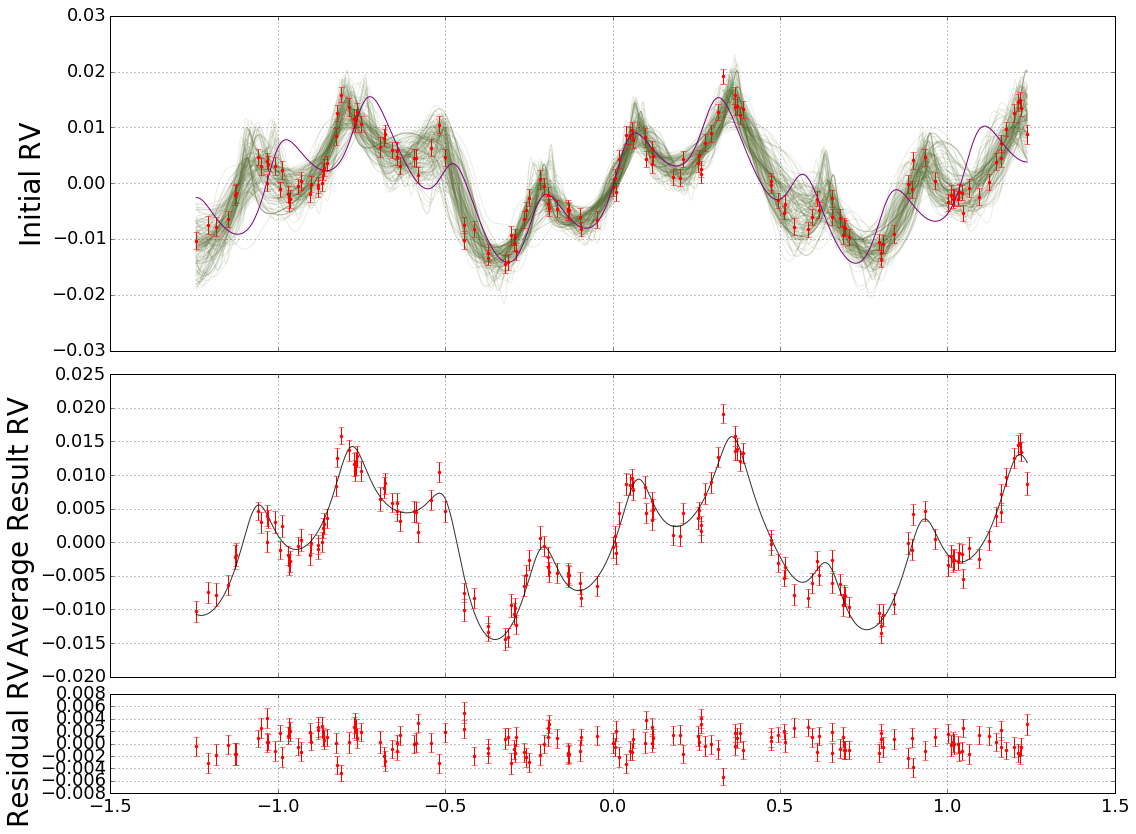

In [7]:
sm_trimmedChain, sm_trimmedChainlogp = driver.inLinePlotResults(sm_bundle, 150, [18,6], 0.5, 2)

In [5]:
sm_actimes = driver.inLinePlotAcTimes(sm_bundle, [18, 6])

NameError: name 'sm_bundle' is not defined

# Alsmala

In [1]:
al_bundle, h2 = driver.createALSMALA('moderate_al', Niteralsmala, starting_state, obs, 0.25, 0.14, 5, 0.1, printing_every=20)

NameError: name 'driver' is not defined

In [2]:
driver.inLinePlotChains(al_bundle, [18,6])

NameError: name 'driver' is not defined

In [ ]:
al_trimmedChain, al_trimmedChainlogp = driver.inLinePlotResults(al_bundle, 150, [18,6], 0.5, 2)

In [ ]:
al_actimes = driver.inLinePlotAcTimes(al_bundle, [18, 6])

# Emcee

In [ ]:
Scale = {'a':0.0001, 'h':0.001,  'k':0.001}
em_bundle, h3 = driver.createEns('moderate_em', Niteremcee, starting_state, obs, 24, Scale, printing_every=150)

In [ ]:
driver.inLinePlotChains(em_bundle, [18,6])

In [ ]:
em_trimmedChain, em_trimmedChainlogp = driver.inLinePlotResults(em_bundle, 150, [18,6], 0.5, 2)

In [ ]:
em_actimes = driver.inLinePlotAcTimes(em_bundle, [18, 6])

# Comparisons - Efficacy

In [ ]:
driver.efficacy(sm_bundle.mcmc_Niter, sm_actimes, sm_bundle.mcmc_clocktimes)

In [ ]:
driver.efficacy(al_bundle.mcmc_Niter, al_actimes, al_bundle.mcmc_clocktimes)

In [ ]:
driver.efficacy(em_bundle.mcmc_Niter, em_actimes, em_bundle.mcmc_clocktimes)

# Comparisons - CDFs

In [ ]:
driver.showCDF(sm_trimmedChain, em_trimmedChain, [4,4])

In [ ]:
driver.showCDF(sm_trimmedChain, al_trimmedChain, [4,4])